In [1]:
from dataclasses import dataclass
import pandas as pd
import random
%matplotlib inline

In [2]:
@dataclass
class ModelInputs:
    start_salary: int = 60000
    promos_every_n_year : int = 5
    cost_o_living_raise :float = 0.02
    promo_rise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    Desired_cash: int = 1500000

model_data = ModelInputs()
model_data           

ModelInputs(start_salary=60000, promos_every_n_year=5, cost_o_living_raise=0.02, promo_rise=0.15, savings_rate=0.25, interest_rate=0.05, Desired_cash=1500000)

In [3]:
data = model_data

In [4]:
data.promo_rise

0.15

In [5]:
def salary_at_year(data,year):
    Num_promos = int(year/data.promos_every_n_year)
    salary_t = data.start_salary *(1+data.cost_o_living_raise)**year *(1+data.promo_rise)**Num_promos
    return salary_t
salary_at_year(data,1)

61200.0

In [6]:
for  i in range(6):
    year=i+1
    salary = salary_at_year(model_data,year)
    print(f'The salary at year {year} is ${salary: ,.0f}')
    

The salary at year 1 is $ 61,200
The salary at year 2 is $ 62,424
The salary at year 3 is $ 63,672
The salary at year 4 is $ 64,946
The salary at year 5 is $ 76,182
The salary at year 6 is $ 77,705


In [7]:
year=3
def cash_saved_during_year(data,year):
    salary= salary_at_year(data,year)
    cash_saved=salary*data.savings_rate
    return cash_saved
cash_saved_during_year(data,5)

19045.3938552

In [8]:
def wealth_at_year(data,year,prior_wealth):
    cash_saved = cash_saved_during_year(data,year)
    wealth = prior_wealth*(1 + data.interest_rate) + cash_saved
    return wealth

In [9]:
prior_wealth = 0
for i in range(30):
    year = i+ 1
    wealth = wealth_at_year(data,year,prior_wealth)
    print(f'The wealth at year {year} is ${wealth:.0f}.')
    
    prior_wealth = wealth

The wealth at year 1 is $15300.
The wealth at year 2 is $31671.
The wealth at year 3 is $49173.
The wealth at year 4 is $67868.
The wealth at year 5 is $90307.
The wealth at year 6 is $114248.
The wealth at year 7 is $139775.
The wealth at year 8 is $166975.
The wealth at year 9 is $195939.
The wealth at year 10 is $229918.
The wealth at year 11 is $266080.
The wealth at year 12 is $304542.
The wealth at year 13 is $345431.
The wealth at year 14 is $388878.
The wealth at year 15 is $439025.
The wealth at year 16 is $492294.
The wealth at year 17 is $548853.
The wealth at year 18 is $608878.
The wealth at year 19 is $672557.
The wealth at year 20 is $745168.
The wealth at year 21 is $822190.
The wealth at year 22 is $903859.
The wealth at year 23 is $990422.
The wealth at year 24 is $1082140.
The wealth at year 25 is $1185745.
The wealth at year 26 is $1295520.
The wealth at year 27 is $1411793.
The wealth at year 28 is $1534910.
The wealth at year 29 is $1665234.
The wealth at year 30 

In [10]:
prior_wealth = 0
wealth = 0
year = 0
print('wealths over time:')
while wealth < data.Desired_cash:
    year = year + 1
    wealth = wealth_at_year(data,year,prior_wealth)
    print(f'The wealth at year{year}is ${wealth:,.0f}.')
    prior_wealth = wealth
print('\nRetirement:')
print(f'It will take{year} years to retire.')
year

wealths over time:
The wealth at year1is $15,300.
The wealth at year2is $31,671.
The wealth at year3is $49,173.
The wealth at year4is $67,868.
The wealth at year5is $90,307.
The wealth at year6is $114,248.
The wealth at year7is $139,775.
The wealth at year8is $166,975.
The wealth at year9is $195,939.
The wealth at year10is $229,918.
The wealth at year11is $266,080.
The wealth at year12is $304,542.
The wealth at year13is $345,431.
The wealth at year14is $388,878.
The wealth at year15is $439,025.
The wealth at year16is $492,294.
The wealth at year17is $548,853.
The wealth at year18is $608,878.
The wealth at year19is $672,557.
The wealth at year20is $745,168.
The wealth at year21is $822,190.
The wealth at year22is $903,859.
The wealth at year23is $990,422.
The wealth at year24is $1,082,140.
The wealth at year25is $1,185,745.
The wealth at year26is $1,295,520.
The wealth at year27is $1,411,793.
The wealth at year28is $1,534,910.

Retirement:
It will take28 years to retire.


28

In [11]:
def get_salaries_wealths_df(data):
    prior_wealth = 0  
    wealth = 0
    
    year = 0  
    
    df_data_tups = []
    while wealth < data.Desired_cash:
        year = year + 1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(model_data, year, prior_wealth)

        prior_wealth = wealth
        
        df_data_tups.append((year, salary, wealth))
        
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [12]:
get_salaries_wealths_df(ModelInputs(start_salary=100000,promo_rise=0.5))

,Year,Salary,Wealth
0,1,1.020000e+05,1.530000e+04
1,2,1.040400e+05,3.167100e+04
2,3,1.061208e+05,4.917267e+04
3,4,1.082432e+05,6.786779e+04
4,5,1.656121e+05,9.030657e+04
5,6,1.689244e+05,1.142482e+05
6,7,1.723029e+05,1.397754e+05
7,8,1.757489e+05,1.669753e+05
8,9,1.792639e+05,1.959394e+05
9,10,2.742737e+05,2.299182e+05


In [13]:
def style_salries_wealth(df):
    return df.style.format({
    'Salary': '${:,.2f}',
    'Wealth': '${:,.2f}',
})

In [14]:
df = get_salaries_wealths_df(model_data)
style_salries_wealth(df)

,Year,Salary,Wealth
0,1,"$61,200.00","$15,300.00"
1,2,"$62,424.00","$31,671.00"
2,3,"$63,672.48","$49,172.67"
3,4,"$64,945.93","$67,867.79"
4,5,"$76,181.58","$90,306.57"
5,6,"$77,705.21","$114,248.20"
6,7,"$79,259.31","$139,775.44"
7,8,"$80,844.50","$166,975.33"
8,9,"$82,461.39","$195,939.45"
9,10,"$96,727.21","$229,918.22"


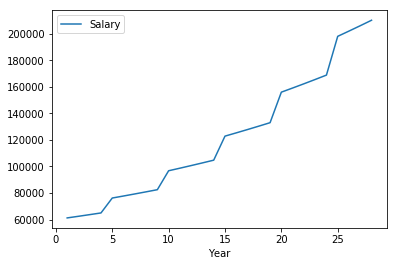

In [15]:
df.plot.line(x='Year', y='Salary')

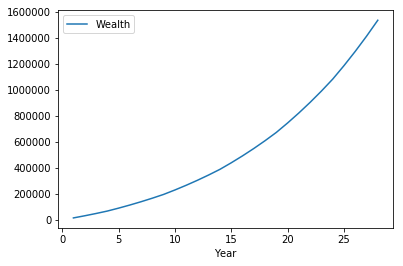

In [16]:
df.plot.line(x='Year', y='Wealth')

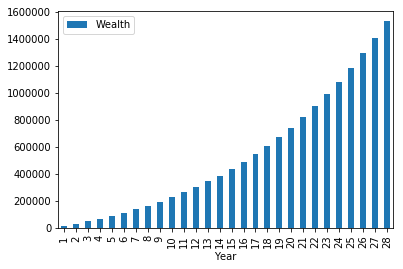

In [17]:
df.plot.bar(x='Year',y='Wealth')

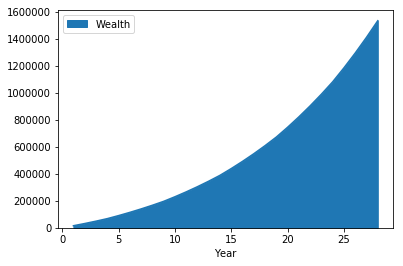

In [18]:
df.plot.area(x='Year',y='Wealth')

In [19]:
df.style.format({
    'Salary': '${:,.2f}',
    'Wealth': '${:,.2f}'
}).bar(subset=['Salary','Wealth'])

,Year,Salary,Wealth
0,1,"$61,200.00","$15,300.00"
1,2,"$62,424.00","$31,671.00"
2,3,"$63,672.48","$49,172.67"
3,4,"$64,945.93","$67,867.79"
4,5,"$76,181.58","$90,306.57"
5,6,"$77,705.21","$114,248.20"
6,7,"$79,259.31","$139,775.44"
7,8,"$80,844.50","$166,975.33"
8,9,"$82,461.39","$195,939.45"
9,10,"$96,727.21","$229,918.22"


In [20]:
#Sensitivity analysis
def my_model(x_1,x_2):
    '''x'''
    return x_1**x_2

In [21]:
y=my_model(2,4)
y

16

In [22]:
x1_values = [10,20,30]
x2_values=[1,2,3]

In [23]:
for x1 in x1_values:
    for x2 in x2_values:
        print(x1,x2)

10 1
10 2
10 3
20 1
20 2
20 3
30 1
30 2
30 3


In [24]:
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1,x2)
        print(y_i)

10
100
1000
20
400
8000
30
900
27000


In [25]:
outputs = []
for x1 in x1_values:
    for x2 in x2_values:
        y_i = my_model(x1,x2)
        outputs.append((x1,x2,y_i))
outputs

[(10, 1, 10),
 (10, 2, 100),
 (10, 3, 1000),
 (20, 1, 20),
 (20, 2, 400),
 (20, 3, 8000),
 (30, 1, 30),
 (30, 2, 900),
 (30, 3, 27000)]

In [26]:
df=pd.DataFrame(outputs,columns=['X_1','X_2','y'])
df

,X_1,X_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


In [27]:
df.style.background_gradient(subset='y',cmap='RdYlGn')

,X_1,X_2,y
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


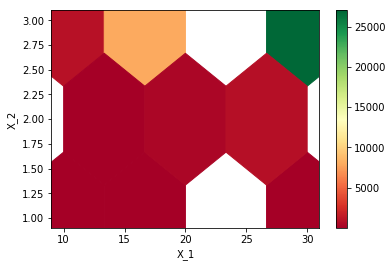

In [28]:
df.plot.hexbin(x='X_1',y='X_2',C='y',gridsize=3,cmap='RdYlGn',sharex=False)

In [29]:
#!python -m pip install sensitivity

In [30]:
from  sensitivity import SensitivityAnalyzer

sensivity_dict ={
    'x_1' : [10,20,30],
    'x_2' : [1,2,3]
}
sa = SensitivityAnalyzer(sensivity_dict,my_model)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 899.04it/s]


In [31]:
sa.df

,x_1,x_2,Result
0,10,1,10
1,10,2,100
2,10,3,1000
3,20,1,20
4,20,2,400
5,20,3,8000
6,30,1,30
7,30,2,900
8,30,3,27000


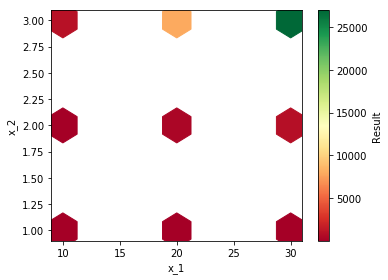

In [32]:
plot =sa.plot()

In [33]:
styled = sa.styled_dfs()

,1,2,3
x_1,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 899.01it/s]


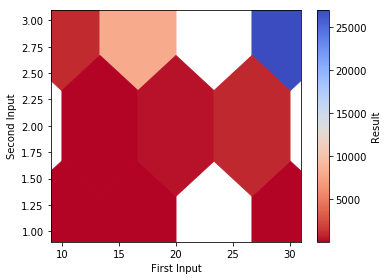

In [34]:
from  sensitivity import SensitivityAnalyzer

labels ={
    'x_1' : 'First Input',
    'x_2' : 'Second Input'
}
sa = SensitivityAnalyzer(
    sensivity_dict,my_model,grid_size=3,reverse_colors=True,color_map='coolwarm',labels=labels
)
plot=sa.plot()


In [35]:
styled =sa.styled_dfs()

,1,2,3
First Input,,,
10,10.000000,100.000000,1000.000000
20,20.000000,400.000000,8000.000000
30,30.000000,900.000000,27000.000000


In [36]:
def my_model_2(x_1,x_2,x_3):
    return x_1*x_2**x_3
senitivity_dict ={
    'x_1':[1,2,3],
    'x_2':[4,5,6],
    'x_3':[7,8,9]
}
sa = SensitivityAnalyzer(senitivity_dict,my_model_2,grid_size=3)

100%|█████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 930.18it/s]


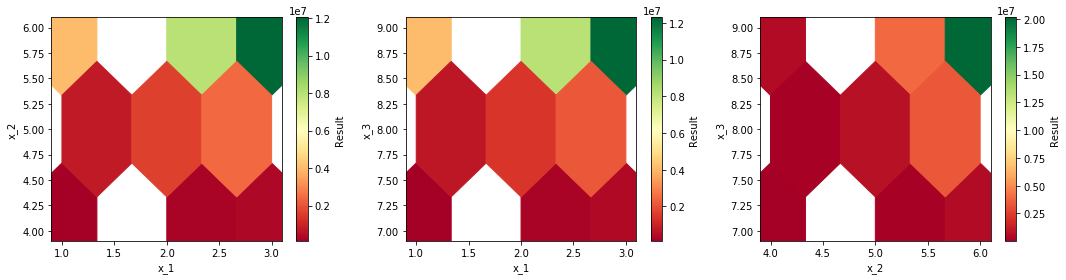

In [37]:
plot=sa.plot()

In [38]:
syled_dic = sa.styled_dfs()

,4,5,6
x_1,,,
1,114688.000000,807291.666667,4012416.000000
2,229376.000000,1614583.333333,8024832.000000
3,344064.000000,2421875.000000,12037248.000000


,7,8,9
x_1,,,
1,124815.000000,711925.666667,4097655.000000
2,249630.000000,1423851.333333,8195310.000000
3,374445.000000,2135777.000000,12292965.000000


,7,8,9
x_2,,,
4,32768.000000,131072.000000,524288.000000
5,156250.000000,781250.000000,3906250.000000
6,559872.000000,3359232.000000,20155392.000000


In [39]:
syled_dic[('x_1','x_2')]

,4,5,6
x_1,,,
1,114688.000000,807291.666667,4012416.000000
2,229376.000000,1614583.333333,8024832.000000
3,344064.000000,2421875.000000,12037248.000000


In [40]:
syled_dict=sa.styled_dfs(num_fmt='${:,.0f}')

,4,5,6
x_1,,,
1,"$114,688","$807,292","$4,012,416"
2,"$229,376","$1,614,583","$8,024,832"
3,"$344,064","$2,421,875","$12,037,248"


,7,8,9
x_1,,,
1,"$124,815","$711,926","$4,097,655"
2,"$249,630","$1,423,851","$8,195,310"
3,"$374,445","$2,135,777","$12,292,965"


,7,8,9
x_2,,,
4,"$32,768","$131,072","$524,288"
5,"$156,250","$781,250","$3,906,250"
6,"$559,872","$3,359,232","$20,155,392"


In [41]:
def years_to_retirement(data:ModelInputs,print_output=False):
    
    prior_wealth = 0  
    wealth = 0
    
    year = 0
    
    if print_output:
        print('Wealths over time:')
    while wealth < data.Desired_cash:
        year = year + 1
        wealth = wealth_at_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')

        prior_wealth = wealth
    if print_output:
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [42]:
years = years_to_retirement(model_data,print_output=True)

Wealths over time:
The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.
The wealth at year 7 is $139,775.
The wealth at year 8 is $166,975.
The wealth at year 9 is $195,939.
The wealth at year 10 is $229,918.
The wealth at year 11 is $266,080.
The wealth at year 12 is $304,542.
The wealth at year 13 is $345,431.
The wealth at year 14 is $388,878.
The wealth at year 15 is $439,025.
The wealth at year 16 is $492,294.
The wealth at year 17 is $548,853.
The wealth at year 18 is $608,878.
The wealth at year 19 is $672,557.
The wealth at year 20 is $745,168.
The wealth at year 21 is $822,190.
The wealth at year 22 is $903,859.
The wealth at year 23 is $990,422.
The wealth at year 24 is $1,082,140.
The wealth at year 25 is $1,185,745.
The wealth at year 26 is $1,295,520.
The wealth at year 27 is $1,411,793.
The wealth at year 28 is $1,534,910.

Reti

In [43]:
years = years_to_retirement(model_data,print_output=False)
years

28

In [44]:
#Sensivity Analysis
def years_to_retirement_separate_args(**kwargs):
    data=ModelInputs(**kwargs)
    return years_to_retirement(data)
years_to_retirement_separate_args(start_salary=1000000,promo_rise=0.7)

5

In [45]:
years_to_retirement_separate_args()

28

In [46]:
[i*10000 for i in range(4,8)]

[40000, 50000, 60000, 70000]

In [47]:
sensivity_values = {
    'start_salary': [i*10000 for i in range(4,8)],
    'interest_rate': [i/100 for i in range(4,8)],
    'promos_every_n_year':[i for i in range(1,4)],
    'cost_o_living_raise':[i/100 for i in range(1,4)],
    'promo_rise':[i/100 for i in range(10,40,10)],
    'savings_rate':[i/100 for i in range(10,40,10)],
    'Desired_cash': [i*100000 for i in range(10,26,10)]

}
labels ={
    "start_salary":"Starting Salary",
    "interest_rate":"Interest Rate",
    "promos_every_n_year":"Promotion",
    "cost_o_living_raise" :"Cost of living",
    "interest_rate":"Interest Rate",
}
sa = SensitivityAnalyzer(sensivity_values,years_to_retirement_separate_args,result_name='Years to retirement',reverse_colors=True,labels=labels,num_fmt='{:.0f}')

100%|█████████████████████████████████████████████████████████████████████████████| 2592/2592 [00:03<00:00, 853.75it/s]


In [48]:
sa.df

,Starting Salary,Interest Rate,Promotion,Cost of living,promo_rise,savings_rate,Desired_cash,Years to retirement
0,40000,0.04,1,0.01,0.1,0.1,1000000,28
1,40000,0.04,1,0.01,0.1,0.1,2000000,34
2,40000,0.04,1,0.01,0.1,0.2,1000000,23
3,40000,0.04,1,0.01,0.1,0.2,2000000,28
4,40000,0.04,1,0.01,0.1,0.3,1000000,20
...,...,...,...,...,...,...,...,...
2587,70000,0.07,3,0.03,0.3,0.1,2000000,26
2588,70000,0.07,3,0.03,0.3,0.2,1000000,17
2589,70000,0.07,3,0.03,0.3,0.2,2000000,21
2590,70000,0.07,3,0.03,0.3,0.3,1000000,14


In [49]:
styled_dict =sa.styled_dfs()

,0.04,0.05,0.06,0.07
Starting Salary,,,,
40000,26,25,24,24
50000,24,23,23,22
60000,23,22,21,21
70000,22,21,20,20


,1,2,3
Starting Salary,,,
40000,18,26,30
50000,17,24,28
60000,16,23,26
70000,16,22,25


,0.01,0.02,0.03
Starting Salary,,,
40000,26,25,24
50000,24,23,22
60000,23,22,21
70000,22,21,20


,0.1,0.2,0.3
Starting Salary,,,
40000,30,24,20
50000,28,22,19
60000,26,21,18
70000,25,20,17


,0.1,0.2,0.3
Starting Salary,,,
40000,30,24,21
50000,28,22,19
60000,26,21,18
70000,25,20,17


,1000000,2000000
Starting Salary,,
40000,22,28
50000,20,26
60000,19,24
70000,18,23


,1,2,3
Interest Rate,,,
0.04,17,25,29
0.05,17,24,28
0.06,17,23,27
0.07,16,22,26


,0.01,0.02,0.03
Interest Rate,,,
0.04,25,24,22
0.05,24,23,22
0.06,23,22,21
0.07,22,21,21


,0.1,0.2,0.3
Interest Rate,,,
0.04,29,23,19
0.05,28,22,19
0.06,27,22,18
0.07,26,21,18


,0.1,0.2,0.3
Interest Rate,,,
0.04,28,23,20
0.05,28,22,19
0.06,27,21,19
0.07,26,21,18


,1000000,2000000
Interest Rate,,
0.04,21,26
0.05,20,26
0.06,20,25
0.07,19,24


,0.01,0.02,0.03
Promotion,,,
1,18,17,16
2,25,24,22
3,29,27,26


,0.1,0.2,0.3
Promotion,,,
1,22,16,13
2,28,23,19
3,31,27,24


,0.1,0.2,0.3
Promotion,,,
1,20,16,14
2,28,23,20
3,33,26,22


,1000000,2000000
Promotion,,
1,15,19
2,21,26
3,24,31


,0.1,0.2,0.3
Cost of living,,,
0.01,29,23,19
0.02,27,22,19
0.03,26,21,18


,0.1,0.2,0.3
Cost of living,,,
0.01,29,23,20
0.02,27,22,19
0.03,26,21,18


,1000000,2000000
Cost of living,,
0.01,21,26
0.02,20,25
0.03,19,24


,0.1,0.2,0.3
promo_rise,,,
0.1,33,26,22
0.2,26,21,18
0.3,22,18,16


,1000000,2000000
promo_rise,,
0.1,24,31
0.2,19,24
0.3,17,21


,1000000,2000000
savings_rate,,
0.1,24,30
0.2,19,24
0.3,16,21


In [50]:
#Scenario Analysis
Bad_economy_Data=ModelInputs(
    start_salary=40000,
    promos_every_n_year=8,
    cost_o_living_raise=0.01,
    promo_rise=0.07,
    savings_rate=0.15,
    interest_rate=0.03
)
Good_economy_Data=ModelInputs(
    start_salary=70000,
    promos_every_n_year=4,
    cost_o_living_raise=0.03,
    promo_rise=0.2,
    savings_rate=0.35,
    interest_rate=0.03
)
cases ={
    'Recession':Bad_economy_Data,
    'Normal':model_data,
    'Expansion': Good_economy_Data
}

In [51]:
for case_type,case_input in cases.items():
    ytr = years_to_retirement(case_input,print_output=False)
    print(f'It would take {ytr} years to retire in a {case_type} economy')

It would take 61 years to retire in a Recession economy
It would take 28 years to retire in a Normal economy
It would take 21 years to retire in a Expansion economy


In [52]:
case_probabilities ={
    "Recession":0.2,
    "Normal":0.5,
    "Expansion":0.3
}
expected_ytr=0
for case_type,case_input in cases.items():
    ytr = years_to_retirement(case_input,print_output=False)
    weighted_ytr=ytr*case_probabilities[case_type]                                 
    expected_ytr=expected_ytr+weighted_ytr
print(f'It would take {expected_ytr:.0f} years to retire,considering'
      f'a {case_probabilities["Recession"]:.0%} chance of Recession and'
      f'a {case_probabilities["Normal"]:.0%} chance of Normal and'
      f'a {case_probabilities["Expansion"]:.0%} chance of Expansion'


     )

It would take 32 years to retire,consideringa 20% chance of Recession anda 50% chance of Normal anda 30% chance of Expansion


In [53]:
#Internal RandomNess

In [54]:
@dataclass
class ModelInputs:
    starting_salary: tuple = (40000, 60000, 70000)
    promos_every_n_years: tuple = (8, 5, 4)
    cost_of_living_raise: tuple = (0.01, 0.02, 0.03)
    promo_raise: tuple = (0.07, 0.15, 0.2)
    savings_rate: tuple = (0.15, 0.25, 0.35)
    interest_rate: tuple = (0.03, 0.05, 0.06)
    desired_cash: int = 1500000
    recession_prob: float = 0.2
    expansion_prob: float = 0.3
    case_names: tuple = ('Recession', 'Normal', 'Expansion')
    n_iter: int = 1000
        
model_data = ModelInputs()
model_data

ModelInputs(starting_salary=(40000, 60000, 70000), promos_every_n_years=(8, 5, 4), cost_of_living_raise=(0.01, 0.02, 0.03), promo_raise=(0.07, 0.15, 0.2), savings_rate=(0.15, 0.25, 0.35), interest_rate=(0.03, 0.05, 0.06), desired_cash=1500000, recession_prob=0.2, expansion_prob=0.3, case_names=('Recession', 'Normal', 'Expansion'), n_iter=1000)

In [55]:
def get_economy_case_number(data):
    """
    Uses the probabilities of a bad and good economy to output the economy case number for a given year.
    
    0 corresponsds to a bad economy, 1 to a normal economy, and 2 to a good economy.
    """
    normal_probability = 1 - data.recession_prob - data.expansion_prob
    case_num = random.choices([0, 1, 2], weights=[data.recession_prob, normal_probability, data.expansion_prob])[0]
    return case_num


case=get_economy_case_number(model_data)
case

1

In [56]:
def salary_at_year(data: ModelInputs, year, case):
    """
    Gets the salary at a given year from the start of the model based on cost of living raises and regular promotions.
    """
    # Every n years we have a promotion, so dividing the years and taking out the decimals gets the number of promotions
    num_promos = int(year / data.promos_every_n_years[case])
    
    # This is the formula above implemented in Python
    salary_t = data.starting_salary[case] * (1 + data.cost_of_living_raise[case]) ** year * (1 + data.promo_raise[case]) ** num_promos
    return salary_t


def cash_saved_during_year(data: ModelInputs, year, case):
    """
    Calculated the cash saved within a given year, by first calculating the salary at that year then applying the 
    savings rate.
    """
    salary = salary_at_year(data, year, case)
    cash_saved = salary * data.savings_rate[case]
    return cash_saved


def wealth_at_year(data: ModelInputs, year, prior_wealth, case):
    """
    Calculate the accumulated wealth for a given year, based on previous wealth, the investment rate,
    and cash saved during the year.
    """
    cash_saved = cash_saved_during_year(data, year, case)
    wealth = prior_wealth * (1 + data.interest_rate[case]) + cash_saved
    return wealth


def years_to_retirement(data: ModelInputs, print_output=True):
    """
    The main model function which calculates the years to retirement based on the model inputs,
    calling the other functions to determine the salaries and wealths over time.
    """
    # starting with no cash saved
    prior_wealth = 0  
    wealth = 0

    year = 0 # will become 1 on first loop

    if print_output:
        print('Wealths over time:') # \n makes a blank line in the output.
    while wealth < data.desired_cash:
        year = year + 1
        case = get_economy_case_number(data)  # 0 = recession, 1 = normal, 2 = expansion
        case_type = data.case_names[case]
        wealth = wealth_at_year(data, year, prior_wealth, case)
        if print_output:
            print(f'The wealth at year {year} ({case_type} economy) is ${wealth:,.0f}.')

        # Set next year's prior wealth to this year's wealth
        prior_wealth = wealth

    # Now we have exited the while loop, so wealth must be >= desired_cash. Whatever last year was set
    # is the years to retirement.
    if print_output:
        print(f'\nRetirement:\nIt will take {year} years to retire.')  # \n makes a blank line in the output.
    return year

In [57]:
years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 (Normal economy) is $15,300.
The wealth at year 2 (Normal economy) is $31,671.
The wealth at year 3 (Normal economy) is $49,173.
The wealth at year 4 (Expansion economy) is $85,213.
The wealth at year 5 (Normal economy) is $108,519.
The wealth at year 6 (Expansion economy) is $150,135.
The wealth at year 7 (Expansion economy) is $195,302.
The wealth at year 8 (Normal economy) is $225,278.
The wealth at year 9 (Normal economy) is $257,157.
The wealth at year 10 (Recession economy) is $271,964.
The wealth at year 11 (Recession economy) is $287,285.
The wealth at year 12 (Normal economy) is $326,808.
The wealth at year 13 (Expansion economy) is $408,588.
The wealth at year 14 (Expansion economy) is $497,141.
The wealth at year 15 (Normal economy) is $552,701.
The wealth at year 16 (Expansion economy) is $667,387.
The wealth at year 17 (Normal economy) is $732,701.
The wealth at year 18 (Recession economy) is $762,899.
The wealth at year 19 (Recessio

26

In [58]:
data= ModelInputs(n_iter=10)
all_ytrs =[]
for i in range (data.n_iter):
    ytr = years_to_retirement(data,print_output=False)
    all_ytrs.append(ytr)
df=pd.DataFrame()
df['years to Retirement']=all_ytrs
df

,years to Retirement
0,26
1,25
2,27
3,22
4,25
5,21
6,26
7,25
8,27
9,28


In [59]:
avg=df['years to Retirement'].mean()
std=df['years to Retirement'].std()
maxi=df['years to Retirement'].max()
mini=df['years to Retirement'].min()
print(
    f'it will take{avg:.0f} years to retire on average with a standard deviation'
    f' of {std:.1f}, max of {maxi:.0f} and min of{mini:.0f}'
)

it will take25 years to retire on average with a standard deviation of 2.2, max of 28 and min of21


In [60]:

def years_to_retirement_case_df(data):
    all_ytrs =[]
    for i in range (data.n_iter):
        ytr = years_to_retirement(data,print_output=False)
        all_ytrs.append(ytr)
    df=pd.DataFrame()
    df['years to Retirement']=all_ytrs
    return df
def summarize_ytr_df(df):
    avg=df['years to Retirement'].mean()
    std=df['years to Retirement'].std()
    maxi=df['years to Retirement'].max()
    mini=df['years to Retirement'].min()
    print(
        f'it will take{avg:.0f} years to retire on average with a standard deviation'
        f' of {std:.1f}, max of {maxi:.0f} and min of{mini:.0f}'
    )
def years_to_retirment_cases_and_summarize(data):
    df=years_to_retirement_case_df(data)
    summarize_ytr_df(df)

In [61]:
years_to_retirment_cases_and_summarize(ModelInputs(desired_cash=2500000))

it will take31 years to retire on average with a standard deviation of 1.8, max of 37 and min of27


In [62]:
#Monte carlo stimulation 

In [63]:
#Portfolio Returns
stock_return =0.1
rf=0.03
stock_weight=0.5
portfolio_ret=rf*(1-stock_weight)+stock_return*stock_weight
portfolio_ret

0.065

In [64]:
portfolio_initial_value=1000

portfolio_end_value = portfolio_initial_value*(1+portfolio_ret)**4
portfolio_end_value

1286.466350625

In [65]:
def port_end_value(stock_return=0.01,rf=0.03,stock_weight=0.5,portfolio_initial_value=1000):
    portfolio_ret=rf*(1-stock_weight)+stock_return*stock_weight
    portfolio_end_value = portfolio_initial_value*(1+portfolio_ret)
    return portfolio_end_value
portfolio_end_value

1286.466350625

In [66]:
port_end_value(0.05,0.03,0.7)

1044.0

In [67]:
import random
stock_mean=0.1
stock_std=0.2
random.normalvariate(stock_mean,stock_std)

0.5301352183386713

In [68]:
stock_ret=random.normalvariate(stock_mean,stock_std)
print(f'running with stock return{stock_ret:.1%}')
port_end_value(stock_ret)

running with stock return-27.1%


879.3536381958775

In [69]:
def port_end_value_simulations(stock_mean=0.1,stock_std=0.2,stock_weight=0.5,n_iter=1000):
    output=[]
    for i in range(n_iter):
        stock_ret=random.normalvariate(stock_mean,stock_std)
        result=port_end_value(stock_ret)
        output.append(result)
    return output
result=port_end_value_simulations(n_iter=10000)
print(f'there are{len(result)} results. First five:')
result[:5]

there are10000 results. First five:


[1090.3321270127622,
 1039.8853846747293,
 929.7614273281652,
 1070.388636115289,
 1095.7481666636634]

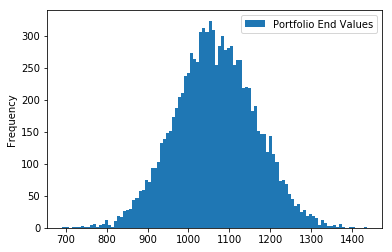

In [70]:
%matplotlib inline
import pandas as pd

df=pd.DataFrame()
df['Portfolio End Values']= result
df.plot.hist(bins=100)

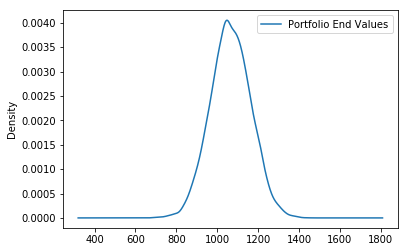

In [71]:
df.plot.kde()

In [72]:
percentiles=[i/100 for i in range(0,100,5)]
percentiles

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [73]:
df['Portfolio End Values'].quantile(percentiles)


0.00     691.775344
0.05     902.983648
0.10     939.709478
0.15     963.309078
0.20     983.469256
0.25     999.097510
0.30    1013.645857
0.35    1027.862396
0.40    1039.615006
0.45    1051.480049
0.50    1063.360420
0.55    1077.555472
0.60    1089.817484
0.65    1103.258041
0.70    1117.325461
0.75    1131.439858
0.80    1148.288538
0.85    1167.173380
0.90    1192.873727
0.95    1226.180539
Name: Portfolio End Values, dtype: float64

In [74]:
(df['Portfolio End Values']>=1050).astype(int)


0       1
1       0
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: Portfolio End Values, Length: 10000, dtype: int32

In [75]:
(df['Portfolio End Values']>=1050).astype(int).mean()# out of 10000 outcomes 5637 cases met the condition


0.5572

In [76]:
#in 5% cases you get less than 900.068202 dollar and 95% case you will have less than 1223.667097 dollar

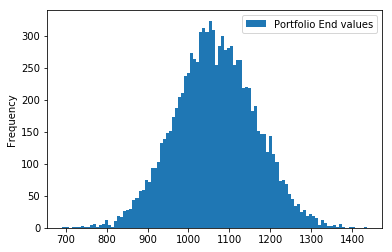

Probability Table
0.05     $902.98
0.10     $939.71
0.15     $963.31
0.20     $983.47
0.25     $999.10
0.30    $1013.65
0.35    $1027.86
0.40    $1039.62
0.45    $1051.48
0.50    $1063.36
0.55    $1077.56
0.60    $1089.82
0.65    $1103.26
0.70    $1117.33
0.75    $1131.44
0.80    $1148.29
0.85    $1167.17
0.90    $1192.87
0.95    $1226.18
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 55.7%



In [77]:
import matplotlib.pyplot as plt

def create_dataframe_fromresults(results):
    df=pd.DataFrame()
    df['Portfolio End values']=results
    return df
def visualize_results(df):
    df.plot.hist(bins=100)
    plt.show()
def probability_table(df):
    percentiles = [i/20 for i in range(1,20)]
    return df['Portfolio End values'].quantile(percentiles)
def probability_of_objective(df,desired_cash=1050):
    return(df['Portfolio End values']>=desired_cash).astype(int).mean()
def model_output(results,desired_cash=1050):
    df=create_dataframe_fromresults(results)
    visualize_results(df)
    prob_table = probability_table(df)
    prob_objective=probability_of_objective(df)
    return prob_table,prob_objective

def display_model_summary(results, desired_cash=1050):
    prob_table, prob_objective = model_output(results, desired_cash=desired_cash)
    print('Probability Table')
    print(prob_table.apply(lambda x: f'${x:.2f}'))  # a way of formatting a pandas series
    print('')
    print(f'Probability of getting ${desired_cash:,.0f} in cash: {prob_objective:.1%}')
    print('')
    
    
display_model_summary(result)

In [78]:
from IPython.display import HTML, display
display(HTML('<h2>My Title</h2>'))

In [79]:
def display_header(header):
    return display(HTML(f'<h2>{header}</h2>'))

display_header('Another Title')

In [80]:
weights = [i/10 for i in range(1, 10)]
weights

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

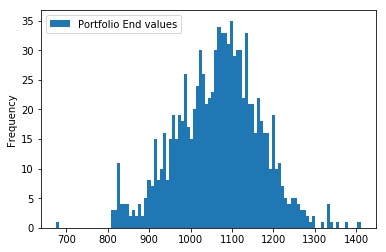

Probability Table
0.05     $897.10
0.10     $935.54
0.15     $960.64
0.20     $981.00
0.25     $999.66
0.30    $1017.40
0.35    $1032.08
0.40    $1047.75
0.45    $1062.33
0.50    $1072.81
0.55    $1085.12
0.60    $1096.12
0.65    $1107.69
0.70    $1120.09
0.75    $1134.20
0.80    $1147.83
0.85    $1167.62
0.90    $1188.87
0.95    $1219.09
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 59.3%



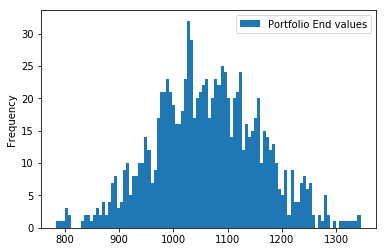

Probability Table
0.05     $902.59
0.10     $938.16
0.15     $967.27
0.20     $983.30
0.25     $994.81
0.30    $1010.40
0.35    $1025.00
0.40    $1034.50
0.45    $1047.94
0.50    $1060.81
0.55    $1075.12
0.60    $1087.52
0.65    $1099.23
0.70    $1114.92
0.75    $1127.00
0.80    $1148.25
0.85    $1166.47
0.90    $1186.83
0.95    $1228.94
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 54.3%



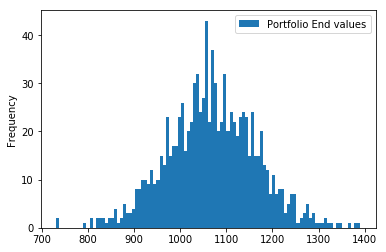

Probability Table
0.05     $911.97
0.10     $947.20
0.15     $970.23
0.20     $989.43
0.25    $1004.56
0.30    $1022.16
0.35    $1034.47
0.40    $1046.21
0.45    $1057.14
0.50    $1067.58
0.55    $1076.91
0.60    $1090.54
0.65    $1103.78
0.70    $1117.85
0.75    $1134.16
0.80    $1148.82
0.85    $1166.49
0.90    $1187.60
0.95    $1224.51
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 58.2%



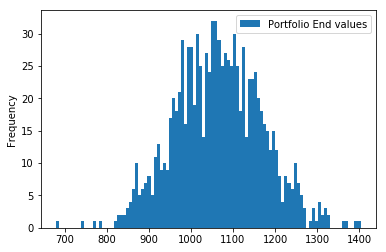

Probability Table
0.05     $895.31
0.10     $934.33
0.15     $960.10
0.20     $978.51
0.25     $995.78
0.30    $1007.48
0.35    $1021.63
0.40    $1039.03
0.45    $1052.23
0.50    $1064.29
0.55    $1077.27
0.60    $1090.38
0.65    $1104.63
0.70    $1119.52
0.75    $1136.92
0.80    $1153.67
0.85    $1170.65
0.90    $1195.53
0.95    $1237.36
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 56.2%



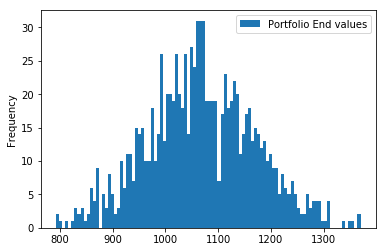

Probability Table
0.05     $896.95
0.10     $938.44
0.15     $960.92
0.20     $984.17
0.25    $1000.37
0.30    $1014.96
0.35    $1027.48
0.40    $1041.21
0.45    $1054.84
0.50    $1065.28
0.55    $1074.34
0.60    $1089.19
0.65    $1108.23
0.70    $1122.17
0.75    $1136.39
0.80    $1154.77
0.85    $1174.34
0.90    $1199.23
0.95    $1236.89
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 57.1%



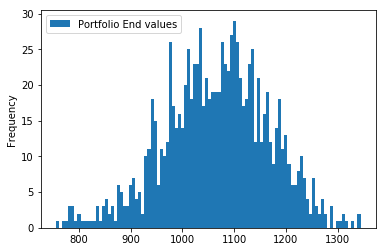

Probability Table
0.05     $895.79
0.10     $939.80
0.15     $965.19
0.20     $981.94
0.25     $999.58
0.30    $1014.78
0.35    $1028.63
0.40    $1041.36
0.45    $1056.96
0.50    $1072.51
0.55    $1083.92
0.60    $1096.65
0.65    $1107.05
0.70    $1121.75
0.75    $1135.27
0.80    $1153.32
0.85    $1171.85
0.90    $1194.17
0.95    $1227.67
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 57.0%



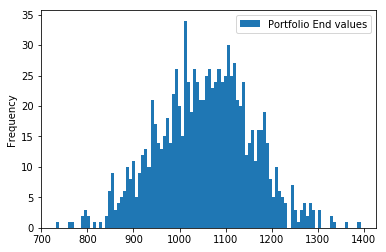

Probability Table
0.05     $886.27
0.10     $923.38
0.15     $945.81
0.20     $967.84
0.25     $986.77
0.30    $1001.06
0.35    $1015.09
0.40    $1030.46
0.45    $1044.79
0.50    $1059.33
0.55    $1073.18
0.60    $1084.93
0.65    $1098.87
0.70    $1110.79
0.75    $1124.24
0.80    $1139.64
0.85    $1160.67
0.90    $1182.90
0.95    $1213.68
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 52.9%



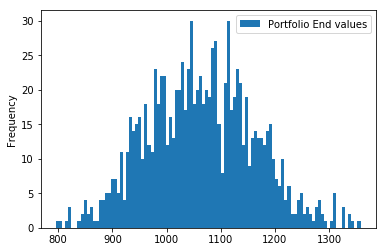

Probability Table
0.05     $907.09
0.10     $936.88
0.15     $957.03
0.20     $979.43
0.25     $991.23
0.30    $1007.22
0.35    $1023.47
0.40    $1037.13
0.45    $1048.15
0.50    $1061.35
0.55    $1076.08
0.60    $1089.26
0.65    $1105.49
0.70    $1116.52
0.75    $1131.21
0.80    $1146.78
0.85    $1168.13
0.90    $1190.44
0.95    $1221.50
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 54.2%



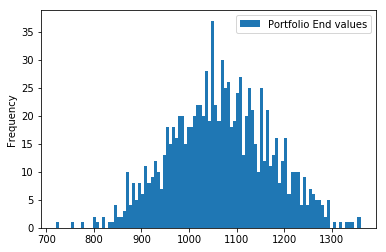

Probability Table
0.05     $895.14
0.10     $929.86
0.15     $957.55
0.20     $977.50
0.25     $993.62
0.30    $1010.67
0.35    $1026.67
0.40    $1039.93
0.45    $1052.63
0.50    $1066.25
0.55    $1077.30
0.60    $1092.28
0.65    $1107.24
0.70    $1123.09
0.75    $1137.73
0.80    $1156.64
0.85    $1178.07
0.90    $1204.13
0.95    $1241.87
Name: Portfolio End values, dtype: object

Probability of getting $1,050 in cash: 56.5%



In [81]:
for weight in weights:
    display_header(f'Results with {weight:.0%} in the Stock')
    results = port_end_value_simulations(stock_weight=weight)
    display_model_summary(results)

In [82]:
#Salary Retirement model with monte carlo simulation 

In [83]:
@dataclass
class ModelInputs:
    starting_salary: int = 60000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    desired_cash: int = 1500000
        
model_data = ModelInputs()
model_data

ModelInputs(starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000)

In [84]:
def salary_at_year(data: ModelInputs, year):
    num_promos = int(year / data.promos_every_n_years)
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise) ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [85]:
for i in range(6):
    year = i + 1
    salary = salary_at_year(model_data, year)
    print(f'The salary at year {year} is ${salary:,.0f}.')

The salary at year 1 is $61,200.
The salary at year 2 is $62,424.
The salary at year 3 is $63,672.
The salary at year 4 is $64,946.
The salary at year 5 is $76,182.
The salary at year 6 is $77,705.


In [86]:
def cash_saved_during_year(data: ModelInputs, year):
    salary = salary_at_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [87]:
def wealth_at_year(data: ModelInputs, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [88]:
prior_wealth = 0 
for i in range(6):
    year = i + 1
    wealth = wealth_at_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')
    prior_wealth = wealth

The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.


In [89]:
def years_to_retirement(data: ModelInputs, print_output=True):
    prior_wealth = 0  
    wealth = 0
    
    year = 0  
    
    if print_output:
        print('Wealths over time:') 
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_at_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')
        prior_wealth = wealth

    if print_output:
        print(f'\nRetirement:\nIt will take {year} years to retire.')
    return year

In [90]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is $15,300.
The wealth at year 2 is $31,671.
The wealth at year 3 is $49,173.
The wealth at year 4 is $67,868.
The wealth at year 5 is $90,307.
The wealth at year 6 is $114,248.
The wealth at year 7 is $139,775.
The wealth at year 8 is $166,975.
The wealth at year 9 is $195,939.
The wealth at year 10 is $229,918.
The wealth at year 11 is $266,080.
The wealth at year 12 is $304,542.
The wealth at year 13 is $345,431.
The wealth at year 14 is $388,878.
The wealth at year 15 is $439,025.
The wealth at year 16 is $492,294.
The wealth at year 17 is $548,853.
The wealth at year 18 is $608,878.
The wealth at year 19 is $672,557.
The wealth at year 20 is $745,168.
The wealth at year 21 is $822,190.
The wealth at year 22 is $903,859.
The wealth at year 23 is $990,422.
The wealth at year 24 is $1,082,140.
The wealth at year 25 is $1,185,745.
The wealth at year 26 is $1,295,520.
The wealth at year 27 is $1,411,793.
The wealth at year 28 is $1,534,910.

Reti

In [91]:
def get_salaries_wealths_df(data):
    prior_wealth = 0  
    wealth = 0
    
    year = 0  
    
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(data, year, prior_wealth)
        prior_wealth = wealth
        df_data_tups.append((year, salary, wealth))
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [92]:
@dataclass
class SimluationInputs:
    n_iterations: int = 10000
    starting_salary_std: int = 10000
    promos_every_n_years_std: int = 1.5
    cost_of_living_raise_std: float = 0.005
    promo_raise_std: float = 0.05
    savings_rate_std: float = 0.07
    interest_rate_std: float = 0.01
        
sim_data = SimluationInputs()

In [93]:
def random_normal_positive(mean, std):
    """
    This function keeps drawing random numbers from a normal distribution until it gets a positive number,
    then it returns that number.
    """
    drawn_value = -1  # initialize to some negative number so that the while loop will start
    while drawn_value < 0:
        drawn_value = random.normalvariate(mean, std)
    return drawn_value

def years_to_retirement_simulation_inputs(data, sim_data):
    """
    Randomly picks values from normal distributions for:
    - starting salary 
    - promotions every N years
    - cost of living raise
    - promotion raise
    - savings rate
    - interest rate
    
    These inputs are drawn based on using the ModelInputs values
    as means, and the _std values in SimulationInputs as standard deviations.
    
    Additionally, if any drawn value is zero or below, it will be drawn again.
    """
    starting_salary = random_normal_positive(data.starting_salary, sim_data.starting_salary_std)
    promos_every_n_years = random_normal_positive(data.promos_every_n_years, sim_data.promos_every_n_years_std)
    cost_of_living_raise = random_normal_positive(data.cost_of_living_raise, sim_data.cost_of_living_raise_std)
    promo_raise = random_normal_positive(data.promo_raise, sim_data.promo_raise_std)
    savings_rate = random_normal_positive(data.savings_rate, sim_data.savings_rate_std)
    interest_rate = random_normal_positive(data.interest_rate, sim_data.interest_rate_std)
    
    return (
        starting_salary,
        promos_every_n_years,
        cost_of_living_raise,
        promo_raise,
        savings_rate,
        interest_rate,
    )
model_data

ModelInputs(starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000)

In [94]:
def years_to_retirement_single_simulation(data, sim_data):
    """
    Runs a single Monte Carlo simulation of the years to retirement model.
    
    Uses years_to_retirement_simulation_inputs
    """
    (
        starting_salary,
        promos_every_n_years,
        cost_of_living_raise,
        promo_raise,
        savings_rate,
        interest_rate,
    ) = years_to_retirement_simulation_inputs(data, sim_data)
    
    new_data = ModelInputs(
        starting_salary=starting_salary,
        promos_every_n_years=promos_every_n_years,
        cost_of_living_raise=cost_of_living_raise,
        promo_raise=promo_raise,
        savings_rate=savings_rate,
        interest_rate=interest_rate,
    )

    ytr = years_to_retirement(new_data, print_output=False)
    
    return (
        starting_salary,
        promos_every_n_years,
        cost_of_living_raise,
        promo_raise,
        savings_rate,
        interest_rate,
        ytr
    )

In [95]:
years_to_retirement_single_simulation(model_data, sim_data)

(48387.77710634759,
 3.156790611839061,
 0.022469715673449128,
 0.10331880110324805,
 0.3120227502023787,
 0.03442775310726486,
 29)

In [96]:
all_results = [years_to_retirement_single_simulation(model_data, sim_data) for i in range(sim_data.n_iterations)]

In [97]:
all_results[:5]

[(62131.630137857865,
  5.0165030944570645,
  0.009284266907265755,
  0.06324820337233021,
  0.2814061987645616,
  0.048959663456327095,
  31),
 (50880.53476937306,
  6.676000305855682,
  0.019640734743729307,
  0.05076399717862784,
  0.1945289979469327,
  0.057807543548670806,
  36),
 (63035.06699045434,
  4.5700172513818815,
  0.017836434186139553,
  0.18487350744752956,
  0.13401716662413315,
  0.05069325184767476,
  34),
 (46689.46133454105,
  5.117338290775585,
  0.023541921943099012,
  0.15407114471484654,
  0.18273220792134687,
  0.06321850892181025,
  32),
 (56506.38057135553,
  3.135494167495446,
  0.028423471680853345,
  0.14008095719489846,
  0.23633923655353792,
  0.0530537364394419,
  26)]

In [98]:
def years_to_retirement_mc(data, sim_data):
    all_results = [years_to_retirement_single_simulation(data, sim_data) for i in range(sim_data.n_iterations)]
    df = pd.DataFrame(
        all_results,
        columns=[
            'Starting Salary', 
            'Promotions Every $N$ Years', 
            'Cost of Living Raise', 
            'Promotion Raise', 
            'Savings Rate', 
            'Interest Rate',
            'Years to Retirement'
        ]
    )
    return df
df = years_to_retirement_mc(model_data, sim_data)
df

,Starting Salary,Promotions Every $N$ Years,Cost of Living Raise,Promotion Raise,Savings Rate,Interest Rate,Years to Retirement
0,77722.859900,6.203231,0.019855,0.183558,0.241818,0.055867,25
1,47319.680874,4.770099,0.018975,0.204649,0.143449,0.059389,34
2,52800.447030,6.971423,0.027987,0.142455,0.184556,0.056229,33
3,54979.868714,3.574242,0.022280,0.072756,0.291295,0.040651,30
4,64877.243698,2.880994,0.021782,0.167160,0.265639,0.049905,23
...,...,...,...,...,...,...,...
9995,36799.440698,3.445009,0.023281,0.143250,0.291903,0.070221,27
9996,65560.905482,5.755565,0.021509,0.248555,0.226891,0.052709,27
9997,68424.102297,6.616069,0.020446,0.233645,0.202096,0.057250,28
9998,79112.159003,5.199767,0.014262,0.138571,0.255547,0.065664,24


In [99]:
def styled_df(df):
    """
    Styles DataFrames containing the inputs and years to retirement.
    """
    return df.style.format({
        'Starting Salary': '${:,.0f}', 
        'Promotions Every $N$ Years': '{:.1f}', 
        'Cost of Living Raise': '{:.2%}', 
        'Promotion Raise': '{:.2%}', 
        'Savings Rate': '{:.2%}', 
        'Interest Rate': '{:.2%}',
        'Years to Retirement': '{:.0f}'
    }).background_gradient(cmap='RdYlGn_r', subset='Years to Retirement')

In [100]:
styled_df(df.head())

,Starting Salary,Promotions Every $N$ Years,Cost of Living Raise,Promotion Raise,Savings Rate,Interest Rate,Years to Retirement
0,"$77,723",6.2,1.99%,18.36%,24.18%,5.59%,25
1,"$47,320",4.8,1.90%,20.46%,14.34%,5.94%,34
2,"$52,800",7.0,2.80%,14.25%,18.46%,5.62%,33
3,"$54,980",3.6,2.23%,7.28%,29.13%,4.07%,30
4,"$64,877",2.9,2.18%,16.72%,26.56%,4.99%,23


In [101]:
print(f'{len(df)} simulations were run.')

10000 simulations were run.


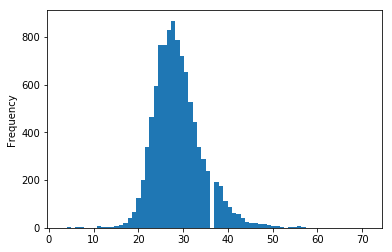

In [102]:
df['Years to Retirement'].plot.hist(bins=70)

In [103]:
styled_df(df.quantile([i/20 for i in range(1,20)]))

,Starting Salary,Promotions Every $N$ Years,Cost of Living Raise,Promotion Raise,Savings Rate,Interest Rate,Years to Retirement
0.05,"$43,143",2.5,1.19%,6.79%,13.40%,3.32%,22
0.1,"$46,836",3.1,1.37%,8.57%,15.98%,3.67%,23
0.15,"$49,490",3.5,1.48%,9.76%,17.76%,3.93%,24
0.2,"$51,497",3.7,1.58%,10.78%,19.03%,4.14%,25
0.25,"$53,242",4.0,1.66%,11.65%,20.17%,4.31%,25
0.3,"$54,691",4.2,1.74%,12.41%,21.33%,4.46%,26
0.35,"$56,113",4.4,1.81%,13.10%,22.27%,4.60%,27
0.4,"$57,480",4.6,1.87%,13.69%,23.16%,4.74%,27
0.45,"$58,773",4.8,1.94%,14.34%,24.06%,4.86%,28
0.5,"$59,996",5.0,2.01%,14.97%,24.99%,4.99%,28


In [104]:
len([i/20 for i in range(1,20)])

19

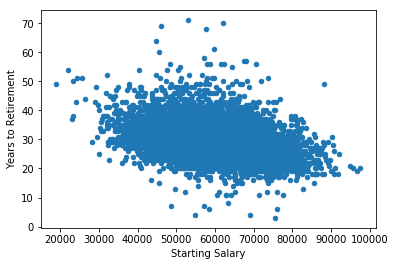

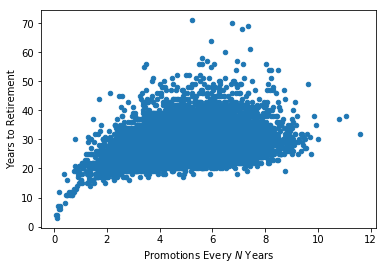

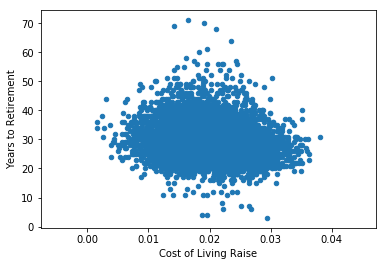

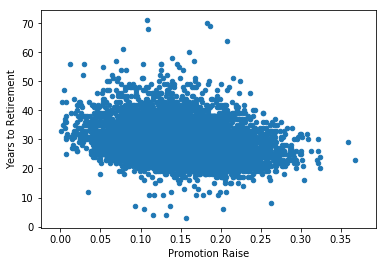

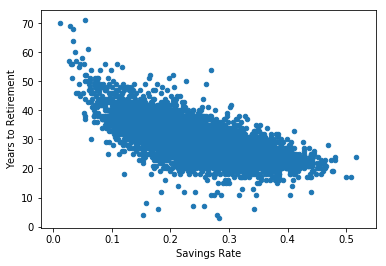

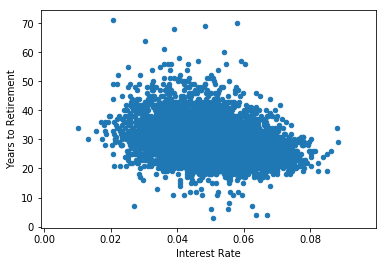

In [105]:
input_cols = [
    'Starting Salary', 
    'Promotions Every $N$ Years', 
    'Cost of Living Raise', 
    'Promotion Raise', 
    'Savings Rate', 
    'Interest Rate',
]

for col in input_cols:
    df.plot.scatter(y='Years to Retirement', x=col)

In [106]:
import statsmodels.api as sm
from sklearn import linear_model
output_col = 'Years to Retirement'

X = df.drop('Years to Retirement',axis='columns').values
y = df['Years to Retirement']
mod =linear_model.LinearRegression()
result = mod.fit(X,y)

In [107]:
x=mod.coef_
x

array([-2.04883613e-04,  1.23225681e+00, -1.75920581e+02, -2.76790092e+01,
       -5.33343597e+01, -1.60567551e+02])

In [108]:
df1 = pd.DataFrame(x)
df1

,0
0,-0.000205
1,1.232257
2,-175.920581
3,-27.679009
4,-53.334360
5,-160.567551


In [109]:
mod.intercept_

64.12857602027053

In [110]:
output_col = 'Years to Retirement'

X = sm.add_constant(df[input_cols])
y = df[output_col]

mod = sm.OLS(y, X)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Years to Retirement   R-squared:                       0.890
Model:                             OLS   Adj. R-squared:                  0.890
Method:                  Least Squares   F-statistic:                 1.346e+04
Date:                 Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                         01:35:29   Log-Likelihood:                -20256.
No. Observations:                10000   AIC:                         4.053e+04
Df Residuals:                     9993   BIC:                         4.058e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         64.1286      0.192    333.821      0.000      63.752      64.505
Starting Salary               -0.0002   1.82e-06   -112.332      0.000      -0.000      -0.000
Promotions Every $N$ Years     1.2323      0.012    100.791      0.000       1.208       1.256
Cost of Living Raise        -175.9206      3.694    -47.626      0.000    -183.161    -168.680
Promotion Raise              -27.6790      0.369    -75.091      0.000     -28.402     -26.956
Savings Rate                 -53.3344      0.261   -204.457      0.000     -53.846     -52.823
Interest Rate               -160.5676      1.805    -88.935      0.000    -164.107    -157.029
==============================================================================
Omnibus:                     4348.105   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354658.853
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                      32.077   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
df.std()

Starting Salary               10066.873291
Promotions Every $N$ Years        1.502008
Cost of Living Raise              0.004971
Promotion Raise                   0.049801
Savings Rate                      0.070393
Interest Rate                     0.010167
Years to Retirement               5.527815
dtype: float64

In [112]:
result.params * df.std()#standard coffecient Savings Rate starting salaries are impactful coffecient 

Cost of Living Raise         -0.874516
Interest Rate                -1.632517
Promotion Raise              -1.378449
Promotions Every $N$ Years    1.850860
Savings Rate                 -3.754341
Starting Salary              -2.062537
Years to Retirement                NaN
const                              NaN
dtype: float64

In [113]:
result.params 

const                          64.128576
Starting Salary                -0.000205
Promotions Every $N$ Years      1.232257
Cost of Living Raise         -175.920581
Promotion Raise               -27.679009
Savings Rate                  -53.334360
Interest Rate                -160.567551
dtype: float64